In [432]:
import shap
shap.initjs()
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt


In [433]:
df = pd.read_csv("C:/Users/chj/Desktop/chj.csv") # ,sep=';')
df.shape
df.columns
df.head()

,σ1,σ2,σ3,σc,Rock Type,Density,Porosity
0,158.0,0.0,0.0,161.0,18,2.9,15.0
1,160.0,0.0,0.0,161.0,18,2.9,15.0
2,176.0,0.0,0.0,161.0,18,2.9,15.0
3,346.0,79.0,0.0,161.0,18,2.9,15.0
4,291.0,149.0,0.0,161.0,18,2.9,15.0


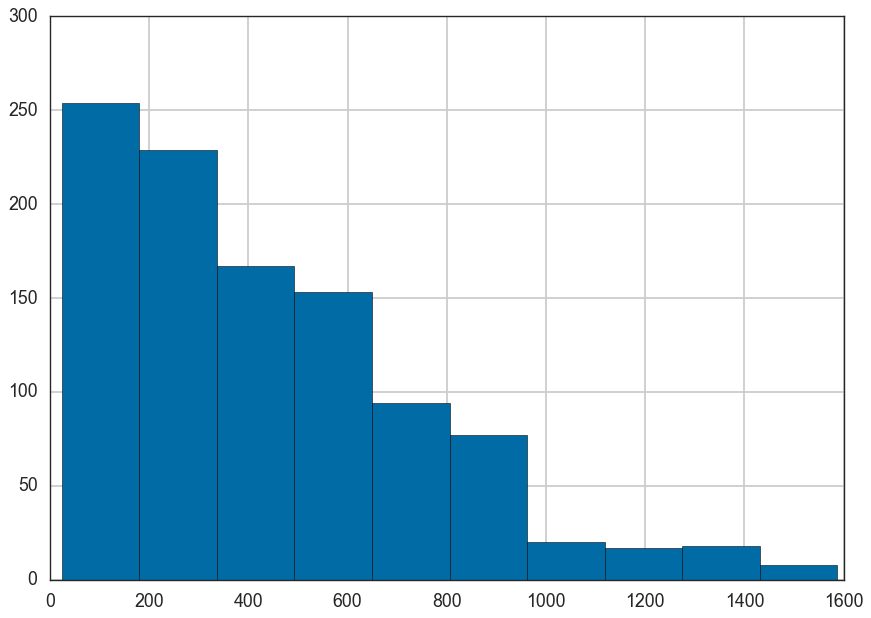

In [434]:
df['σ1'].hist()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

Y = df['σ1']
X =  df[['σ2', 'σ3', 'σc', 'Rock Type',
       'Density', 'Porosity']]

In [435]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [436]:
X_test.shape

(312, 6)

In [437]:
X_test.mean()

σ2           142.591590
σ3            49.768590
σc           132.305128
Rock Type     12.576923
Density        2.571250
Porosity       7.948590
dtype: float64

In [438]:
X_test.iloc[10,:]

σ2           57.00
σ3           20.00
σc           74.00
Rock Type     9.00
Density       2.38
Porosity     18.00
Name: 342, dtype: float64

[0.02362027 0.27783987 0.08511689 0.58046564 0.02265074 0.01030658]


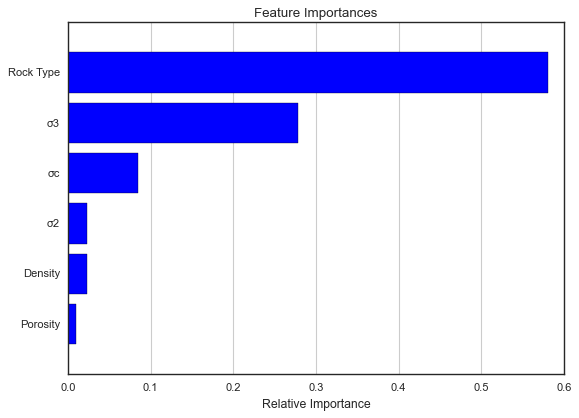

,feature,importance
3,Rock Type,119.097908
1,σ3,110.549728
2,σc,73.683647
0,σ2,40.230968
4,Density,16.705381
5,Porosity,13.986252


In [513]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)  
print(rf.feature_importances_)

importances = rf.feature_importances_
indices = np.argsort(importances)

features = X_train.columns

plt.title('Feature Importances')

plt.grid(axis="x")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = np.abs(shap_values).mean(0)
feature_importance.sort_values('importance', ascending=False)

In [270]:
import shap
shap.initjs()
rf_explainer = shap.KernelExplainer(rf.predict, X_test)
rf_shap_values = rf_explainer.shap_values(X_test)

Using 312 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|████████████████████████████████████████████████████████████████████████████████| 312/312 [00:20<00:00, 15.41it/s]


In [271]:
X_test

,σ2,σ3,σc,Rock Type,Density,Porosity
597,170.9,10.0,57.0,7,2.42,17.50
822,64.0,40.0,82.0,12,2.65,0.37
97,129.0,25.0,265.0,21,2.54,0.65
75,330.7,105.0,265.0,21,2.54,0.65
249,80.0,40.0,310.0,22,2.57,0.62
...,...,...,...,...,...,...
493,660.0,100.0,160.0,13,2.84,0.48
462,200.0,10.0,160.0,13,2.84,0.48
172,362.0,125.0,265.0,21,2.54,0.65
693,150.0,150.0,30.0,2,2.15,24.00


In [272]:
rf_explainer(X_test)

100%|████████████████████████████████████████████████████████████████████████████████| 312/312 [00:20<00:00, 15.37it/s]


.values =
array([[   5.97322346, -130.35609605,  -40.33108907,  -73.46612485,
          -1.95237103,    3.1453707 ],
       [ -29.1757747 ,   17.77676885,  -25.13642218, -104.73926823,
           5.22467199,   -4.14096412],
       [   2.85356797,  -56.99226222,   38.34564474,  137.78133213,
          -6.49872874,    0.59360624],
       ...,
       [  61.66632741,  202.17362158,   48.38343605,  163.80839096,
         -39.74357176,    5.70330297],
       [   3.5309119 ,  222.98144011,  -53.64982056, -139.80957382,
         -11.58974701,  -14.72177677],
       [ -32.62685394,   21.80289472,  -26.86506248,  -89.26670882,
          -4.46087711,    1.24010623]])

.base_values =
array([412.47412169, 412.47412169, 412.47412169, 412.47412169,
       412.47412169, 412.47412169, 412.47412169, 412.47412169,
       412.47412169, 412.47412169, 412.47412169, 412.47412169,
       412.47412169, 412.47412169, 412.47412169, 412.47412169,
       412.47412169, 412.47412169, 412.47412169, 412.47412169,
    

In [273]:
rf_shap_values

array([[   5.97322346, -130.35609605,  -40.33108907,  -73.46612485,
          -1.95237103,    3.1453707 ],
       [ -29.1757747 ,   17.77676885,  -25.13642218, -104.73926823,
           5.22467199,   -4.14096412],
       [   2.85356797,  -56.99226222,   38.34564474,  137.78133213,
          -6.49872874,    0.59360624],
       ...,
       [  61.66632741,  202.17362158,   48.38343605,  163.80839096,
         -39.74357176,    5.70330297],
       [   3.5309119 ,  222.98144011,  -53.64982056, -139.80957382,
         -11.58974701,  -14.72177677],
       [ -32.62685394,   21.80289472,  -26.86506248,  -89.26670882,
          -4.46087711,    1.24010623]])

In [274]:
rf_explainer.expected_value

412.4741216896409

In [441]:
# plot the SHAP values for the 10th observation 
shap.force_plot(rf_explainer.expected_value, rf_shap_values[100,:], X_test.iloc[100,:]) #, link="logit")

In [447]:

shap.force_plot(rf_explainer.expected_value, rf_shap_values, X_test)


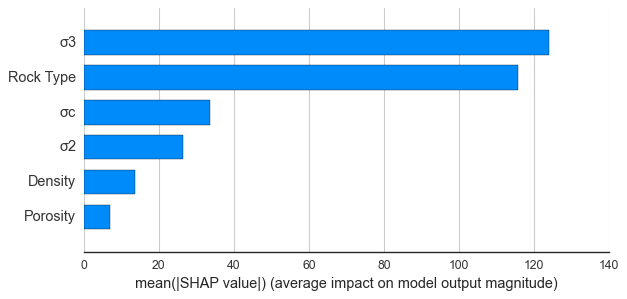

,feature,importance
3,Rock Type,119.097908
1,σ3,110.549728
2,σc,73.683647
0,σ2,40.230968
4,Density,16.705381
5,Porosity,13.986252


In [514]:
import  matplotlib.pyplot as plt

plt.grid(axis="x")
shap.summary_plot(rf_shap_values, X_test, plot_type="bar")

print()
feature_importance = pd.DataFrame()
feature_importance['feature'] = X.columns
feature_importance['importance'] = np.abs(shap_values).mean(0)
feature_importance.sort_values('importance', ascending=False)

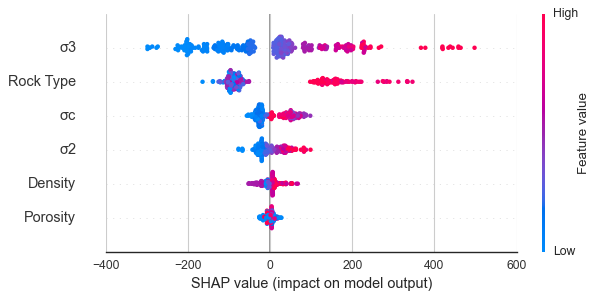

In [517]:

plt.grid(axis="x")
shap.summary_plot(rf_shap_values, X_test)

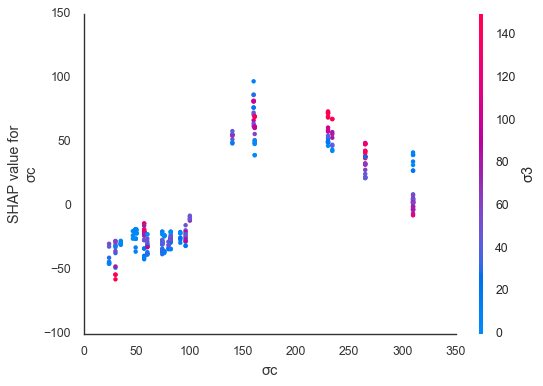

In [456]:

shap.dependence_plot("σc", rf_shap_values, X_test)

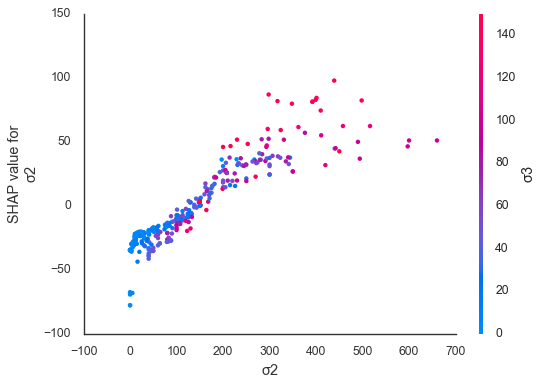

In [457]:
shap.dependence_plot("σ2", rf_shap_values, X_test)

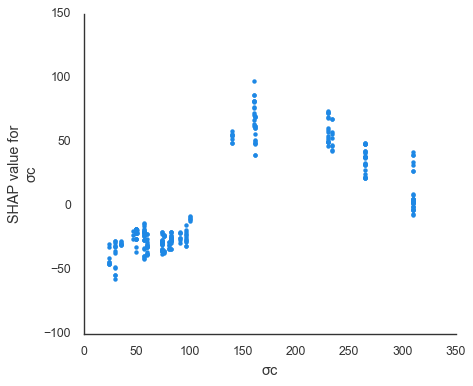

In [458]:


shap.dependence_plot('σc', rf_shap_values, X_test, interaction_index=None, show=False)   #shap_values, data[cols]

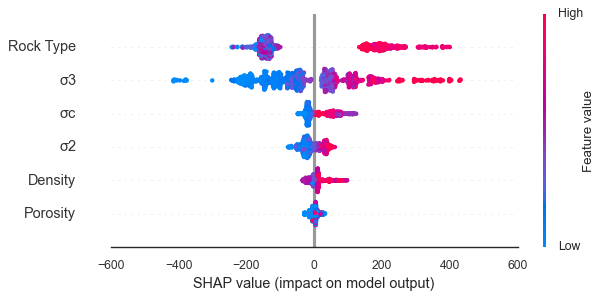

In [459]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)# visualize the impact of each features
shap.summary_plot(shap_values, X)


[16:21:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


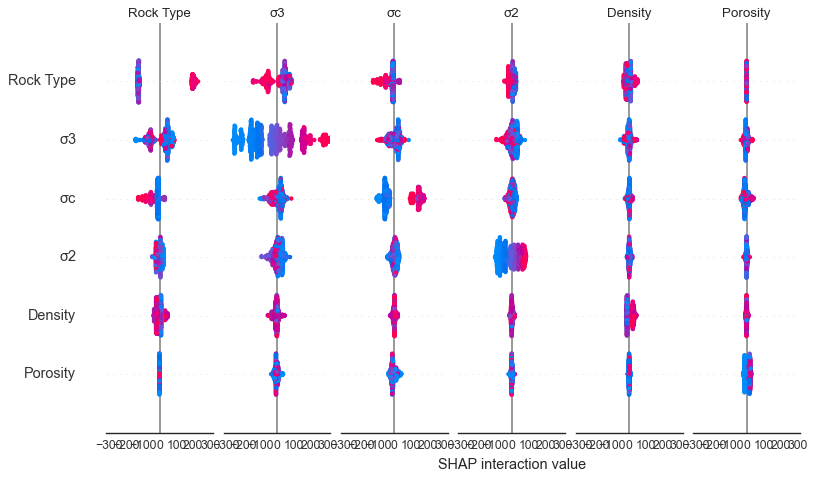

In [505]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(data[cols])
shap.summary_plot(shap_interaction_values, data[cols], max_display=8
                 )

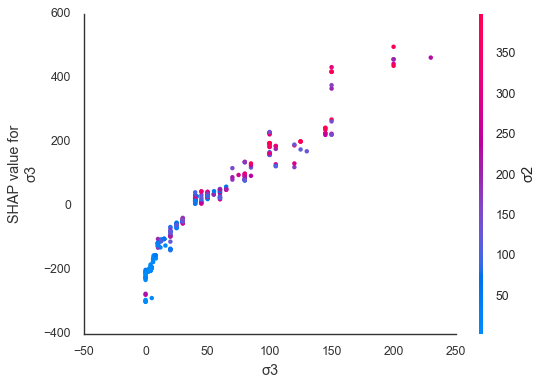

In [461]:
shap.dependence_plot('σ3', rf_shap_values, X_test, interaction_index='σ2', show=False)

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


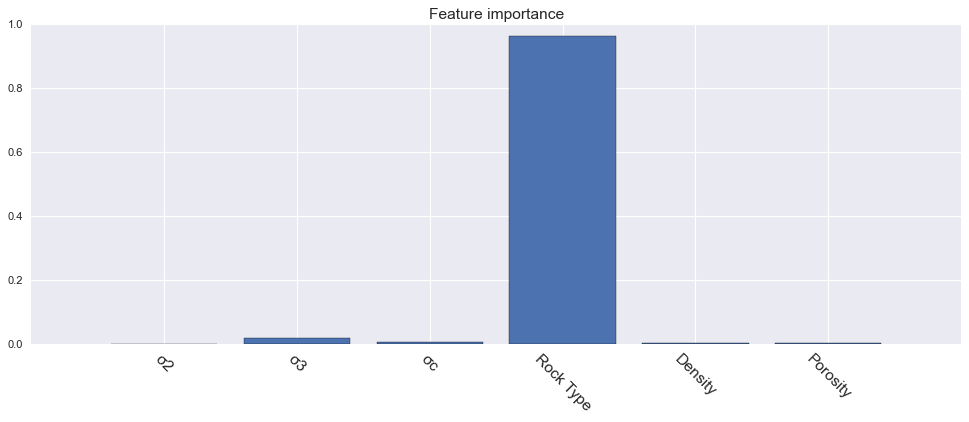

In [473]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use('seaborn')

# 读取数据，目标变量y是球员的身价（万欧元）
data = pd.read_csv('C:/Users/chj/Desktop/chj.csv')

# 选择特征，这里只是举例，未必是最佳组合
# 特征依次为身高（厘米）、潜力、速度、射门、传球、带球、防守、体格、国际知名度、年龄
cols = ['σ2', 'σ3', 'σc', 'Rock Type','Density', 'Porosity']

# 训练xgboost回归模型
model = xgb.XGBRegressor(max_depth=5, learning_rate=0.05, n_estimators=150)
model.fit(data[cols], data['σ1'].values)

# 获取feature importance
plt.figure(figsize=(15, 5))
plt.bar(range(len(cols)), model.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-45, fontsize=14)
plt.title('Feature importance', fontsize=14)
plt.show()

In [463]:
import shap
# model是在第1节中训练的模型
explainer = shap.TreeExplainer(model)

[15:41:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [464]:
shap_values = explainer.shap_values(data[cols])
print(shap_values.shape)


(1037, 6)


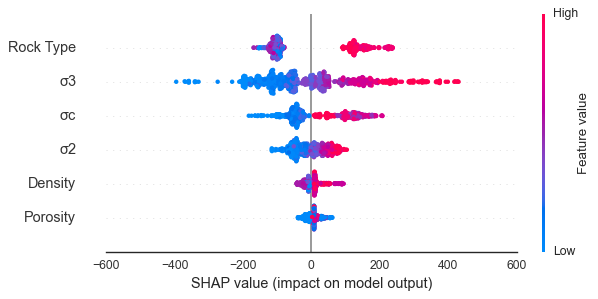

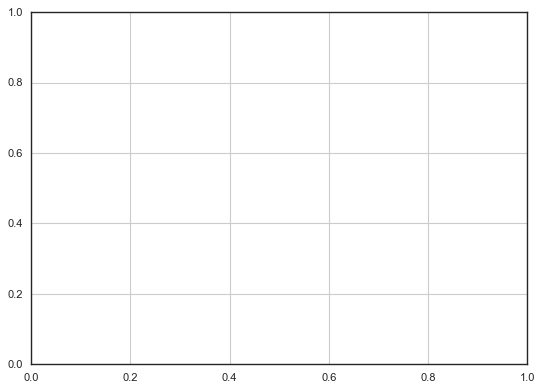

In [519]:

shap.summary_plot(shap_values, data[cols])
plt.grid()

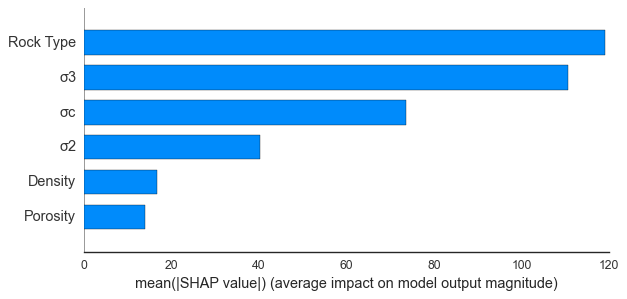

In [476]:
shap.summary_plot(shap_values, data[cols], plot_type="bar")

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.


(-130.0, 120.0)

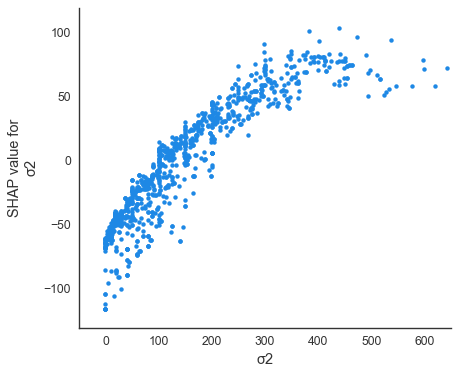

In [475]:
plt.style.use('seaborn-white')
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8

shap.dependence_plot('σ2', shap_values, data[cols], interaction_index=None, show=False,)
plt.xlim((-50,650))
plt.ylim((-130,120))


[17:06:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


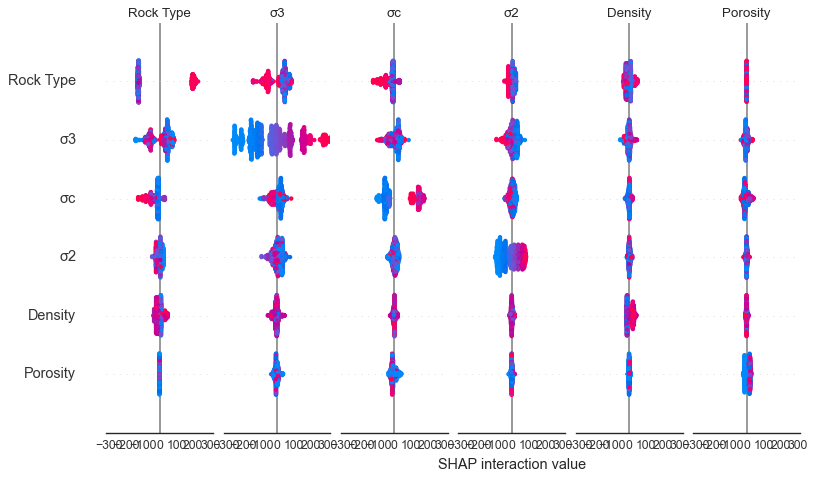

In [515]:

shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(data[cols])
shap.summary_plot(shap_interaction_values, data[cols], max_display=8)


(-130.0, 120.0)

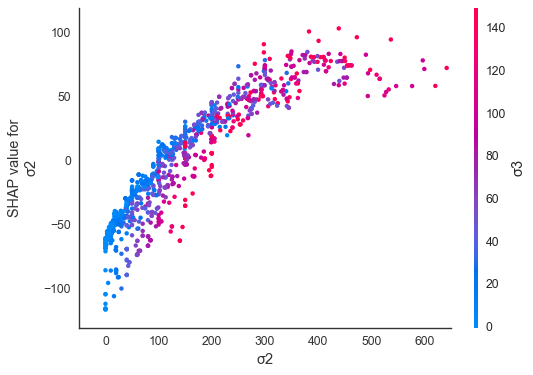

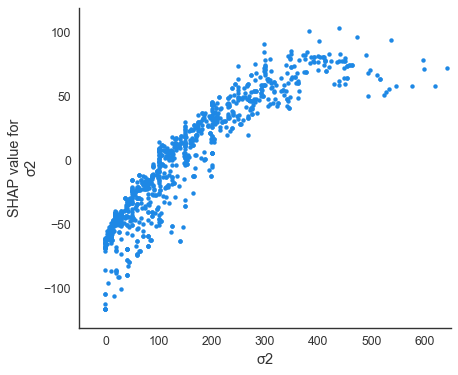

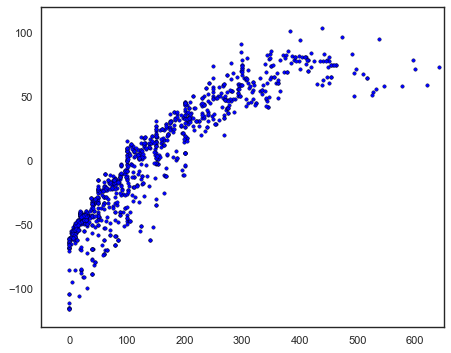

In [494]:
shap.dependence_plot('σ2', shap_values, data[cols], interaction_index='σ3', show=False)
plt.xlim((-50,650))
plt.ylim((-130,120))
shap.dependence_plot('σ2', shap_values, data[cols], interaction_index=None, show=False)
plt.xlim((-50,650))
plt.ylim((-130,120))
plt.figure(figsize=(6.5, 5))
plt.scatter(X['σ2'], shap_values[:, 0], s=10, alpha=1)
plt.xlim((-50,650))
plt.ylim((-130,120))

Original size: [7.5 5. ]
New size: [7.5   5.625]


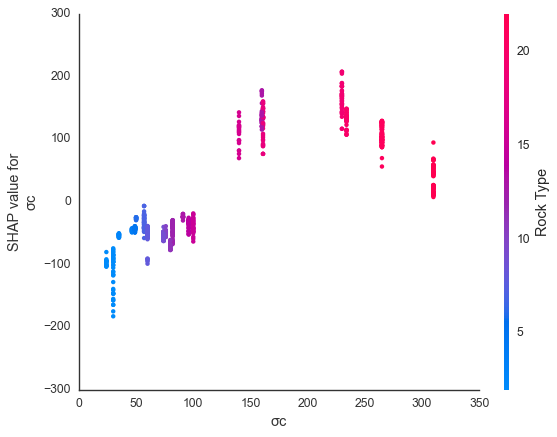

In [485]:
shap.dependence_plot('σc', shap_values, data[cols], interaction_index='Rock Type', show=False)
print(f'Original size: {plt.gcf().get_size_inches()}')
w, _ = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(w, w*3/4)
plt.tight_layout()
print(f'New size: {plt.gcf().get_size_inches()}')

plt.savefig('fig_tes1.svg', bbox_inches='tight',dpi=100)

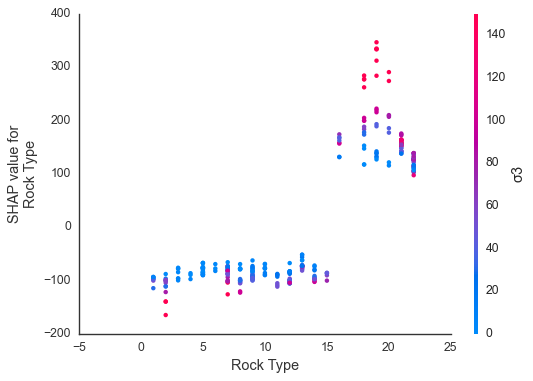

Original size: [8.  5.5]
New size: [8. 6.]


<Figure size 640x480 with 0 Axes>

In [504]:
shap.dependence_plot("Rock Type", rf_shap_values, X_test)
print(f'Original size: {plt.gcf().get_size_inches()}')
w, _ = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(w, w*3/4)
plt.tight_layout()
print(f'New size: {plt.gcf().get_size_inches()}')

plt.savefig('fig_tes1.svg', bbox_inches='tight',dpi=100)

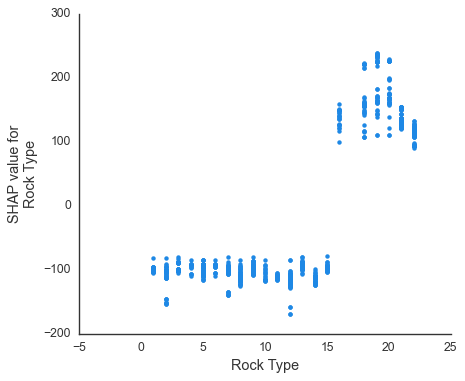

In [503]:

shap.dependence_plot('Rock Type', shap_values, X, interaction_index=None)


(array([-150., -100.,  -50.,    0.,   50.,  100.,  150.]),
 [Text(0, -150.0, '−150'),
  Text(0, -100.0, '−100'),
  Text(0, -50.0, '−50'),
  Text(0, 0.0, '0'),
  Text(0, 50.0, '50'),
  Text(0, 100.0, '100'),
  Text(0, 150.0, '150')])

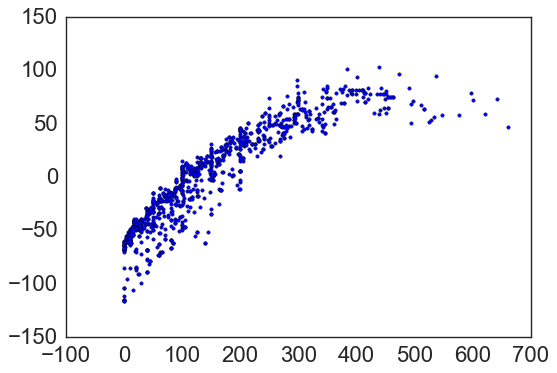

In [502]:
plt.figure(figsize=(7.5, 5))
plt.scatter(X['σ2'], shap_values[:, 0], s=10, alpha=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [501]:
import sys
sys.path

['C:\\Users\\chj\\gru',
 'D:\\anaconda\\envs\\tf\\python39.zip',
 'D:\\anaconda\\envs\\tf\\DLLs',
 'D:\\anaconda\\envs\\tf\\lib',
 'D:\\anaconda\\envs\\tf',
 '',
 'C:\\Users\\chj\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\chj\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32',
 'C:\\Users\\chj\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\chj\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'D:\\anaconda\\envs\\tf\\lib\\site-packages',
 'D:\\anaconda\\envs\\tf\\lib\\site-packages\\win32',
 'D:\\anaconda\\envs\\tf\\lib\\site-packages\\win32\\lib',
 'D:\\anaconda\\envs\\tf\\lib\\site-packages\\Pythonwin']